<a href="https://colab.research.google.com/github/HimaVarshini-Pasupuleti/MLproject/blob/main/task3_ml_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
import joblib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Telco_customer_churn.csv to Telco_customer_churn.csv


In [3]:
df = pd.read_csv("Telco_customer_churn.csv")

In [4]:
print(df.head())
print(df.info())


   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

Churn Label
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


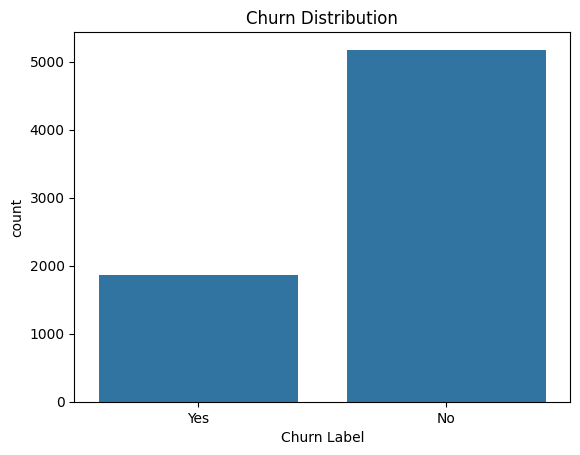

In [5]:
print(df['Churn Label'].value_counts(normalize=True))
sns.countplot(x='Churn Label', data=df)
plt.title('Churn Distribution')
plt.show()


In [6]:
df = df.drop("Country", axis=1)

# Convert TotalCharges to numeric
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")
df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)


/tmp/ipython-input-3032327665.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)


In [7]:
print(df.columns)

Index(['CustomerID', 'Count', 'State', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Reason'],
      dtype='object')


In [8]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = label_enc.fit_transform(df[col])

# Features and Target
X = df.drop("Churn Label", axis=1)
y = df["Churn Label"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

results = {}
for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:36:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [11]:
# Best model selection
best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

if best_model_name == "Logistic Regression":
    best_model = models["Logistic Regression"]
    best_X_train, best_X_test = X_train_scaled, X_test_scaled
else:
    best_model = models[best_model_name]
    best_X_train, best_X_test = X_train, X_test


Best Model: Logistic Regression with accuracy 1.0000


Top Features:
 Churn Value          4.629632
Churn Score          1.113737
Monthly Charges      0.224452
Paperless Billing    0.092845
Multiple Lines       0.072076
dtype: float64


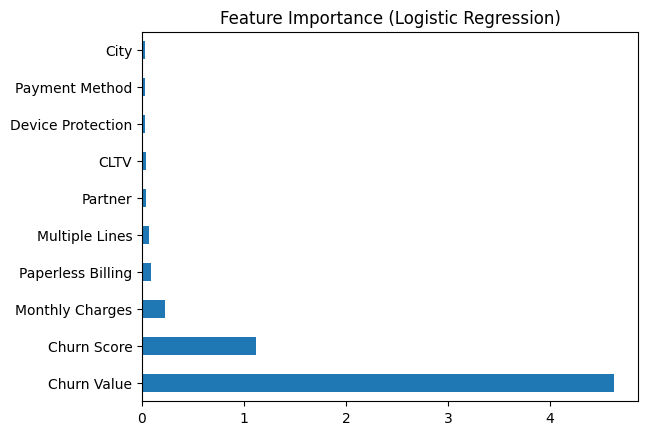

In [12]:
if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
    feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print("Top Features:\n", feature_imp.head())
    feature_imp.head(10).plot(kind="barh")
    plt.title("Feature Importance")
    plt.show()
elif best_model_name == "Logistic Regression":
    importances = best_model.coef_[0]
    feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    print("Top Features:\n", feature_imp.head())
    feature_imp.head(10).plot(kind="barh")
    plt.title("Feature Importance (Logistic Regression)")
    plt.show()


In [13]:
best_model_name = max(results, key=results.get)

if best_model_name == "Logistic Regression":
    best_model = models["Logistic Regression"]
    best_X_train, best_X_test = X_train_scaled, X_test_scaled
else:
    best_model = models[best_model_name]
    best_X_train, best_X_test = X_train, X_test
best_model_name

'Logistic Regression'

In [14]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(best_model, "churn_model.pkl")



['churn_model.pkl']

In [15]:
# Load and simulate prediction
scaler_loaded = joblib.load("scaler.pkl")
model_loaded = joblib.load("churn_model.pkl")
scaler_loaded
model_loaded

LogisticRegression(max_iter=500)

In [16]:
new_customer = X_test.iloc[0:1]  # take one customer
if best_model_name == "Logistic Regression":
    new_customer_scaled = scaler_loaded.transform(new_customer)
    print("Prediction:", model_loaded.predict(new_customer_scaled))
else:
    print("Prediction:", model_loaded.predict(new_customer))

Prediction: [1]


In [18]:
prediction = model_loaded.predict(new_customer_scaled if best_model_name == "Logistic Regression" else new_customer)
label = "Churn" if prediction[0] == 1 else "No Churn"
print(f"Prediction: {label}")


Prediction: Churn
